# John's EDA

In [1]:
#Importing Modules
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
#Reading and Filtering Files
counties = pd.read_csv("Data_Raw\\us-counties.csv", index_col=['date'])
header=['date', 'county', 'state', 'fips', 'cases', 'deaths']
dates = pd.DatetimeIndex(counties.index)
dates=dates.strftime('%B-%d')
counties.index=dates
counties.head()
#len(counties)

,county,state,fips,cases,deaths
date,,,,,
January-21,Snohomish,Washington,"53,061.00",1,0
January-22,Snohomish,Washington,"53,061.00",1,0
January-23,Snohomish,Washington,"53,061.00",1,0
January-24,Cook,Illinois,"17,031.00",1,0
January-24,Snohomish,Washington,"53,061.00",1,0


In [4]:
# Step 1: Summing all the cases on April 15 in California
total = 0
filtered = counties[(counties.index=='April-15')&(counties['state']=='California')]['cases']
for i in range(0,len(filtered)):
    #print(counties[(counties.index==each)&(counties['state']=='California')]['cases'][i])
    total += counties[(counties.index=='April-15')&(counties['state']=='California')]['cases'][i]
print("Cases in California on April 15:", total)

Cases in California on April 15: 27107


In [5]:
# Step 2: Summing all the cases on all dates in 5 states (took John 1+ minutes to load)

states = ['California', 'Colorado', 'Kansas', 'New York', 'Washington']
#states = ['California']  <- tried it on California first to match step 1
cases={}
for state in states:
    cases_list=[]
    for each in counties.index.unique():
        total = 0
        filtered = counties[(counties.index==each)&(counties['state']==state)]['cases']
        for i in range(0,len(filtered)):
            total += counties[(counties.index==each)&(counties['state']==state)]['cases'][i]
        cases_list.append(total)
    cases[state]=cases_list
cases

{'California': [0,
  0,
  0,
  0,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  8,
  9,
  9,
  9,
  11,
  11,
  26,
  26,
  27,
  28,
  33,
  38,
  45,
  55,
  67,
  81,
  100,
  112,
  172,
  179,
  202,
  252,
  320,
  381,
  478,
  588,
  732,
  893,
  1067,
  1283,
  1544,
  1851,
  2239,
  2645,
  3184,
  4061,
  4916,
  5567,
  6322,
  7422,
  8584,
  9858,
  11190,
  12568,
  13796,
  15202,
  16361,
  17539,
  19043,
  20191,
  21366,
  22421,
  23323,
  24334,
  25758,
  27107],
 'Colorado': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  8,
  8,
  12,
  17,
  34,
  49,
  78,
  103,
  136,
  161,
  183,
  216,
  278,
  364,
  475,
  591,
  721,
  912,
  1086,
  1432,
  1735,
  2063,
  2315,
  2656,
  2990,
  3350

In [6]:
#Creating a separate data frame for Date and number of cases reported in each of the 5 states
states = ['California', 'Colorado', 'Kansas', 'New York', 'Washington']

data = {'calendar':list(counties.index.unique()),
        states[0]: cases[states[0]],
        states[1]: cases[states[1]],
        states[2]: cases[states[2]],
        states[3]: cases[states[3]],
        states[4]: cases[states[4]]
        }
cases_by_state = pd.DataFrame(data, columns = ['calendar',states[0], states[1],states[2],states[3],states[4]])
cases_by_state

,calendar,California,Colorado,Kansas,New York,Washington
0,January-21,0,0,0,0,1
1,January-22,0,0,0,0,1
2,January-23,0,0,0,0,1
3,January-24,0,0,0,0,1
4,January-25,1,0,0,0,1
...,...,...,...,...,...,...
81,April-11,22421,6893,1283,180458,10224
82,April-12,23323,7303,1338,188694,10411
83,April-13,24334,7691,1385,195031,10538
84,April-14,25758,7941,1441,202208,10694


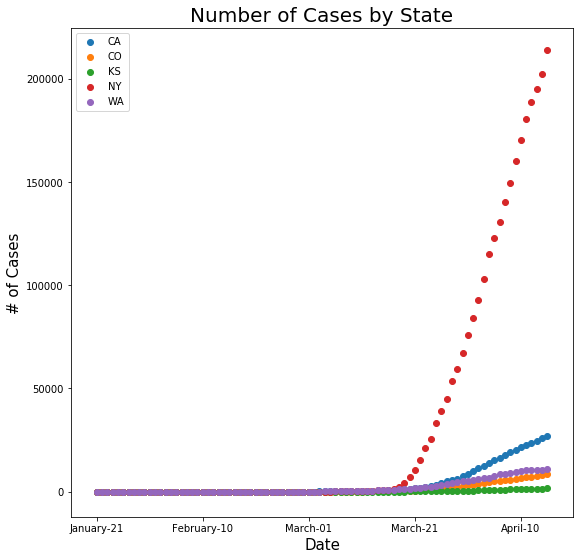

In [9]:
#first plot
fig, axs = plt.subplots(figsize=(9,9))

#scatter of each of the 5 states
axs.scatter(cases_by_state.calendar,cases_by_state.California)
axs.scatter(cases_by_state.calendar,cases_by_state.Colorado)
axs.scatter(cases_by_state.calendar,cases_by_state.Kansas)
axs.scatter(cases_by_state.calendar,cases_by_state['New York'])
axs.scatter(cases_by_state.calendar,cases_by_state.Washington)


#Labeling
axs.set_title("Number of Cases by State", fontsize=20)
axs.set_ylabel('# of Cases', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
axs.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])